In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# set target image file
image_filename = 'target_image.png'

In [3]:
# define function to calculate Fourier transform of the grating of the given image
def calculate_2dft(input):
    ft = np.fft.ifftshift(input)
    ft = np.fft.fft2(ft)
    return np.fft.fftshift(ft)

# define function to calculate the inverse Fourier transform of the Fourier transform of the given image
def calculate_2dift(input):
    ift = np.fft.ifftshift(input)
    ift = np.fft.ifft2(ift)
    ift = np.fft.fftshift(ift)
    return ift.real

# define function to calculate distance from given coordinates to center
def calculate_distance_from_centre(coords, centre):
    # distance from the center is the square root of x^2 + y^2
    return np.sqrt(
        (coords[0] - centre) ** 2 + (coords[1] - centre) ** 2
    )

# define function to find coordinates symmetric to given coordinates
def find_symmetric_coordinates(coords, centre):
    return (centre + (centre - coords[0]),
            centre + (centre - coords[1]))

# define function to display plots
def display_plots(individual_grating, reconstruction, idx):
    plt.subplot(121)
    plt.imshow(individual_grating)
    plt.axis('off')
    plt.subplot(122)
    plt.imshow(reconstruction)
    plt.axis('off')
    plt.suptitle(f'Terms: {idx}')
    #plt.pause(0.01)

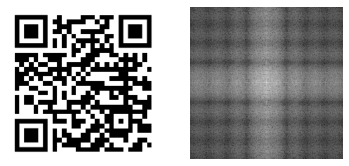

Saving image 1
Saving image 2
Saving image 3
Saving image 4
Saving image 5
Saving image 6
Saving image 7
Saving image 8
Saving image 9
Saving image 10
Saving image 11
Saving image 12
Saving image 13
Saving image 14
Saving image 15
Saving image 16
Saving image 17
Saving image 18
Saving image 19
Saving image 20
Saving image 21
Saving image 22
Saving image 23
Saving image 24
Saving image 25
Saving image 26
Saving image 27
Saving image 28
Saving image 29
Saving image 30
Saving image 31
Saving image 32
Saving image 33
Saving image 34
Saving image 35
Saving image 36
Saving image 37
Saving image 38
Saving image 39
Saving image 40
Saving image 41
Saving image 42
Saving image 43
Saving image 44
Saving image 45
Saving image 46
Saving image 47
Saving image 48
Saving image 49
Saving image 50
Saving image 51
Saving image 52
Saving image 53
Saving image 54
Saving image 55
Saving image 56
Saving image 57
Saving image 58
Saving image 59
Saving image 60
Saving image 61
Saving image 62
Saving image 63
S

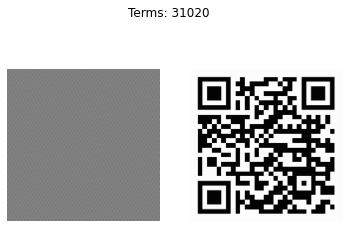

In [4]:
# read image
image = plt.imread(image_filename)
image = image[:, :, :3].mean(axis = 2)

# minimize array dimensions, set image to square and center array
array_size = min(image.shape) - 1 + min(image.shape) % 2
image = image[:array_size, :array_size]
centre = int((array_size - 1) / 2)

# identify coordinate pairs on the left side of the array
coords_left_half = (
    (x, y) for x in range(array_size) for y in range(centre + 1)
)

# sort coordinate pairs in order of distance from center
coords_left_half = sorted(
    coords_left_half,
    key = lambda x: calculate_distance_from_centre(x, centre)
)

plt.set_cmap('gray')

ft = calculate_2dft(image)

# display grayscale image and its Fourier transform
plt.subplot(121)
plt.imshow(image)
plt.axis('off')
plt.subplot(122)
plt.imshow(np.log(abs(ft)))
plt.axis('off')
plt.pause(2)

# display image reconstruction
fig = plt.figure()

# generate blank arrays
rec_image = np.zeros(image.shape)
individual_grating = np.zeros(
    image.shape, dtype = 'complex'
)
idx = 0

# set value until which all steps are displayed
display_all_until = 200
# set value to skip steps to display
display_step = 10
# set index of next step to display
next_display = display_all_until + display_step

file_number = 0
for coords in coords_left_half:
    # only include if points are in the top half of the center column
    if not (coords[1] == centre and coords[0] > centre):
        idx += 1
        symm_coords = find_symmetric_coordinates(
            coords, centre
        )
        
        # Copy values from Fourier transform for the given pair of points
        individual_grating[coords] = ft[coords]
        individual_grating[symm_coords] = ft[symm_coords]
               
        # Calculate inverse Fourier transform and add this to the reconstructed image
        rec_grating = calculate_2dift(individual_grating)
        rec_image += rec_grating  
        
        # Clear the array
        individual_grating[coords] = 0
        individual_grating[symm_coords] = 0        

        # display steps using step display index set above
        if idx < display_all_until or idx == next_display:
            if idx > display_all_until:
                next_display += display_step
                display_step += 10
            display_plots(rec_grating, rec_image, idx)
            print(f'Saving image {file_number + 1}')
            plt.savefig(f'image-{file_number}.png')
            file_number += 1